In [36]:
# imports for array-handling and plotting
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# let's keep our keras backend tensorflow quiet
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
# for testing on CPU
#os.environ['CUDA_VISIBLE_DEVICES'] = ''

# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from sklearn.metrics import roc_auc_score, r2_score
from sklearn.metrics import accuracy_score, roc_curve, auc
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers.normalization import BatchNormalization
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib_inline

UsageError: Line magic function `%matplotlib_inline` not found.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

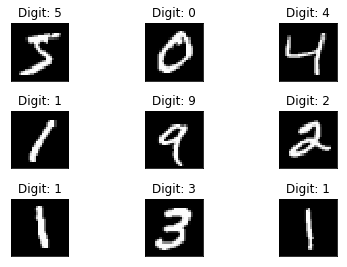

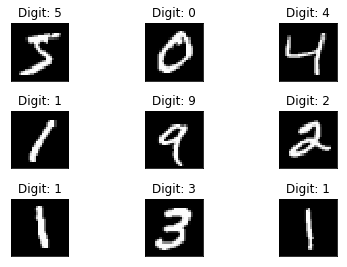

In [4]:
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
fig

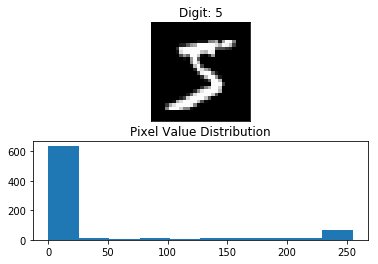

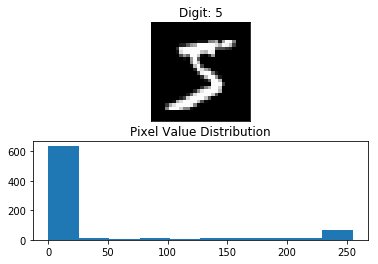

In [5]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")
fig

In [6]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_Train = X_train.reshape(len(X_train), 784)
X_Test = X_test.reshape(len(X_test), 784)


# normalizing the data to help with the training
X_train /= 255
X_test /= 255

X_Train /= 255
X_Test /= 255

# print the final input shape ready for training
print("Train cnn matrix shape", X_train.shape)
print("Train dnn matrix shape", X_Train.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train cnn matrix shape (60000, 28, 28)
Train dnn matrix shape (60000, 784)


In [7]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64))


In [8]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


<hr>

### DNN Neural network

In [15]:

### DNN Neural network


save_dir = "./results/"
model_name = 'keras_mnist_dnn.h5'
model_pathDnn = os.path.join(save_dir, model_name)

batch_size = 128
epochs = 10
patience = 5
min_delta= 0.001

# building a linear stack of layers with the sequential model
modelDnn = Sequential()
modelDnn.add(Dense(512, input_shape=(784,)))
modelDnn.add(Activation('relu'))                            
modelDnn.add(Dropout(0.2))

modelDnn.add(Dense(512))
modelDnn.add(Activation('relu'))
modelDnn.add(Dropout(0.2))

modelDnn.add(Dense(10))
modelDnn.add(Activation('softmax'))

# compiling the sequential model
modelDnn.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model and saving metrics in history
historyDnn = modelDnn.fit(X_Train, Y_train,
          batch_size=batch_size, epochs=epochs,
          verbose=2,
          validation_data=(X_Test, Y_test),
          callbacks=[
            ModelCheckpoint(model_pathDnn, save_best_only=True),
            EarlyStopping(monitor='val_loss', mode='min', patience=patience, min_delta=min_delta, verbose=2)
          ])


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 7s - loss: 0.8232 - accuracy: 0.7574 - val_loss: 0.3675 - val_accuracy: 0.8945
Epoch 2/20
 - 7s - loss: 0.3536 - accuracy: 0.8955 - val_loss: 0.2836 - val_accuracy: 0.9180
Epoch 3/20
 - 7s - loss: 0.2759 - accuracy: 0.9180 - val_loss: 0.2219 - val_accuracy: 0.9333
Epoch 4/20
 - 6s - loss: 0.2225 - accuracy: 0.9334 - val_loss: 0.1924 - val_accuracy: 0.9416
Epoch 5/20
 - 6s - loss: 0.1862 - accuracy: 0.9442 - val_loss: 0.1597 - val_accuracy: 0.9505
Epoch 6/20
 - 6s - loss: 0.1602 - accuracy: 0.9519 - val_loss: 0.1412 - val_accuracy: 0.9571
Epoch 7/20
 - 6s - loss: 0.1388 - accuracy: 0.9585 - val_loss: 0.1218 - val_accuracy: 0.9606
Epoch 8/20
 - 6s - loss: 0.1231 - accuracy: 0.9627 - val_loss: 0.1093 - val_accuracy: 0.9660
Epoch 9/20
 - 6s - loss: 0.1104 - accuracy: 0.9660 - val_loss: 0.1013 - val_accuracy: 0.9675
Epoch 10/20
 - 6s - loss: 0.0996 - accuracy: 0.9698 - val_loss: 0.0960 - val_accuracy: 0.9705
Epoch 11/20
 - 6s -

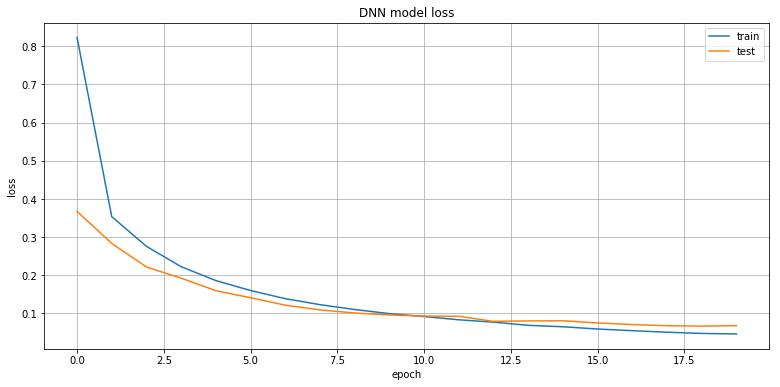

In [17]:
# plotting the metrics
fig = plt.figure(figsize=(13,6))
ax = plt.subplot(111)
ax.plot(historyDnn.history['loss'])
ax.plot(historyDnn.history['val_loss'])
ax.set_title('DNN model loss')
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
ax.legend(['train', 'test'], loc='upper right')
ax.grid(True)
plt.show()

In [40]:
Y_Pred_dnn = modelDnn.predict(X_Test)
predicted = np.argmax(Y_Pred_dnn, axis=1)

roc_auc = accuracy_score(y_test, predicted)
print("ROC AUC: " +  str(roc_auc))

ROC AUC: 0.978


In [41]:
class_names = np.unique(y_train)
aucDf = pd.DataFrame(columns = ["Value", "RocAuc"])
for w in class_names:
    ytrue = Y_test[:, w]
    ypred = Y_Pred_dnn[:, w]
    rocauc = roc_auc_score(ytrue, ypred)
    aucDf = aucDf.append({"Value":int(w), "RocAuc":rocauc}, ignore_index=True)
aucDf.Value = aucDf.Value.astype(int)
display(aucDf)

,Value,RocAuc
0,0,0.999865
1,1,0.999835
2,2,0.999790
3,3,0.999669
4,4,0.999774
5,5,0.999776
6,6,0.999638
7,7,0.999705
8,8,0.999642
9,9,0.999169


In [42]:
#acc_thresh = 0.6
#print("Accuracy treshold = " + str(acc_thresh))
actual = y_test
predictedDnn = predicted

resultsDnn = confusion_matrix(actual, predictedDnn) 
print ('Confusion Matrix :')
print(resultsDnn) 
print ('Accuracy Score :',accuracy_score(actual, predictedDnn) )
print ('Report : ')
print (classification_report(actual, predictedDnn))

Confusion Matrix :
[[ 967    0    0    2    1    2    3    0    2    3]
 [   0 1126    2    1    0    1    2    0    3    0]
 [   3    3 1000    8    1    0    1    6   10    0]
 [   0    0    2  992    0    3    0    3    7    3]
 [   1    0    1    0  959    1    3    3    1   13]
 [   2    0    0    9    1  870    4    0    4    2]
 [   4    3    2    1    5    3  934    0    6    0]
 [   1    6    9    2    0    0    0  996    4   10]
 [   3    0    2    3    2    3    2    2  954    3]
 [   1    2    0    8    6    5    1    1    3  982]]
Accuracy Score : 0.978
Report : 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.97     

<hr>

### CNN Neural network

In [43]:
#Reshape to (I, H, W, C)
#    I: Images count
#    H: Geight of image in pixels
#    W: Width Image in pixels
#    C: Color channels: 1-GtayScale, 3-RGB


X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

input_shape = (28, 28, 1)
num_classes = 10 
batch_size = 64
epochs = 10
patience = 5
min_delta= 0.001

In [44]:
### CNN Neural network

# building a linear stack of layers with the sequential model

model_name = 'keras_mnist_conv.h5'
save_dir = "./results/"
model_path = os.path.join(save_dir, model_name)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal',input_shape=input_shape))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.20))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=batch_size, epochs=epochs,
          verbose=2,
          validation_data=(X_test, Y_test),
          callbacks=[
            ModelCheckpoint(model_path, save_best_only=True),
            EarlyStopping(monitor='val_loss', mode='min', patience=patience, min_delta=min_delta, verbose=2)
          ])



Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 55s - loss: 0.2182 - accuracy: 0.9363 - val_loss: 0.0839 - val_accuracy: 0.9743
Epoch 2/10
 - 54s - loss: 0.0988 - accuracy: 0.9696 - val_loss: 0.0526 - val_accuracy: 0.9831
Epoch 3/10
 - 54s - loss: 0.0765 - accuracy: 0.9755 - val_loss: 0.0542 - val_accuracy: 0.9821
Epoch 4/10
 - 54s - loss: 0.0682 - accuracy: 0.9780 - val_loss: 0.0451 - val_accuracy: 0.9853
Epoch 5/10
 - 54s - loss: 0.0592 - accuracy: 0.9807 - val_loss: 0.0605 - val_accuracy: 0.9817
Epoch 6/10
 - 54s - loss: 0.0537 - accuracy: 0.9833 - val_loss: 0.0431 - val_accuracy: 0.9862
Epoch 7/10
 - 54s - loss: 0.0462 - accuracy: 0.9852 - val_loss: 0.0354 - val_accuracy: 0.9880
Epoch 8/10
 - 54s - loss: 0.0430 - accuracy: 0.9864 - val_loss: 0.0384 - val_accuracy: 0.9873
Epoch 9/10
 - 54s - loss: 0.0398 - accuracy: 0.9874 - val_loss: 0.0355 - val_accuracy: 0.9875
Epoch 10/10
 - 53s - loss: 0.0372 - accuracy: 0.9880 - val_loss: 0.0460 - val_accuracy: 0.9839


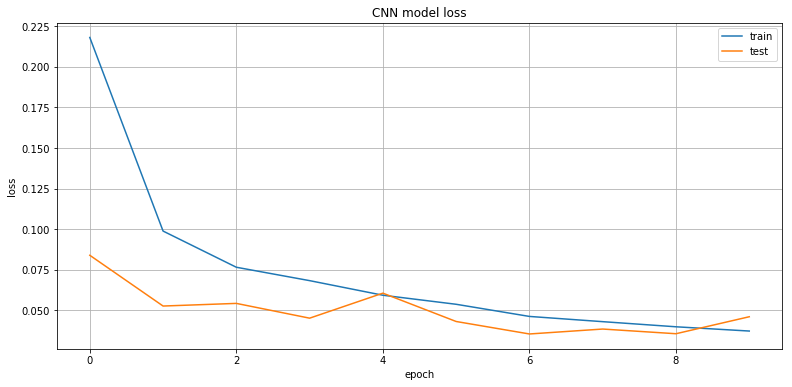

In [45]:
# plotting the metrics
fig = plt.figure(figsize=(13,6))
ax = plt.subplot(111)
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_title('CNN model loss')
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
ax.legend(['train', 'test'], loc='upper right')
ax.grid(True)


plt.show()

In [46]:
Y_Pred = model.predict(X_test)
predicted = np.argmax(Y_Pred, axis=1)

roc_auc = accuracy_score(y_test, predicted)
print("ROC AUC: " +  str(roc_auc))

ROC AUC: 0.9839


In [47]:
class_names = np.unique(y_train)
aucDf = pd.DataFrame(columns = ["Value", "RocAuc"])
for w in class_names:
    ytrue = Y_test[:, w]
    ypred = Y_Pred[:, w]
    rocauc = roc_auc_score(ytrue, ypred)
    aucDf = aucDf.append({"Value":int(w), "RocAuc":rocauc}, ignore_index=True)
aucDf.Value = aucDf.Value.astype(int)
display(aucDf)

,Value,RocAuc
0,0,0.999963
1,1,0.999981
2,2,0.999890
3,3,0.999938
4,4,0.999920
5,5,0.999795
6,6,0.999904
7,7,0.999915
8,8,0.999852
9,9,0.999723


In [48]:
#acc_thresh = 0.6
#print("Accuracy treshold = " + str(acc_thresh))
actual = y_test
predictedDnn = predicted

resultsDnn = confusion_matrix(actual, predictedDnn) 
print ('Confusion Matrix :')
print(resultsDnn) 
print ('Accuracy Score :',accuracy_score(actual, predictedDnn) )
print ('Report : ')
print (classification_report(actual, predictedDnn))


Confusion Matrix :
[[ 971    1    1    1    0    3    1    0    1    1]
 [   0 1130    1    2    0    0    0    2    0    0]
 [   0    2 1013    4    1    0    0   12    0    0]
 [   0    0    0 1008    0    1    0    0    1    0]
 [   0    0    1    0  965    0    3    3    0   10]
 [   0    0    0   23    0  867    1    1    0    0]
 [   5    2    0    1    2    8  937    0    3    0]
 [   0    1    3    1    0    0    0 1023    0    0]
 [   1    1    3   10    0    2    0    4  946    7]
 [   0    2    1   12    3    4    0    7    1  979]]
Accuracy Score : 0.9839
Report : 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.95      1.00      0.97      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.97      0.98       892
           6       0.99      0.98    

In [49]:

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i].reshape(28,28)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} - {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

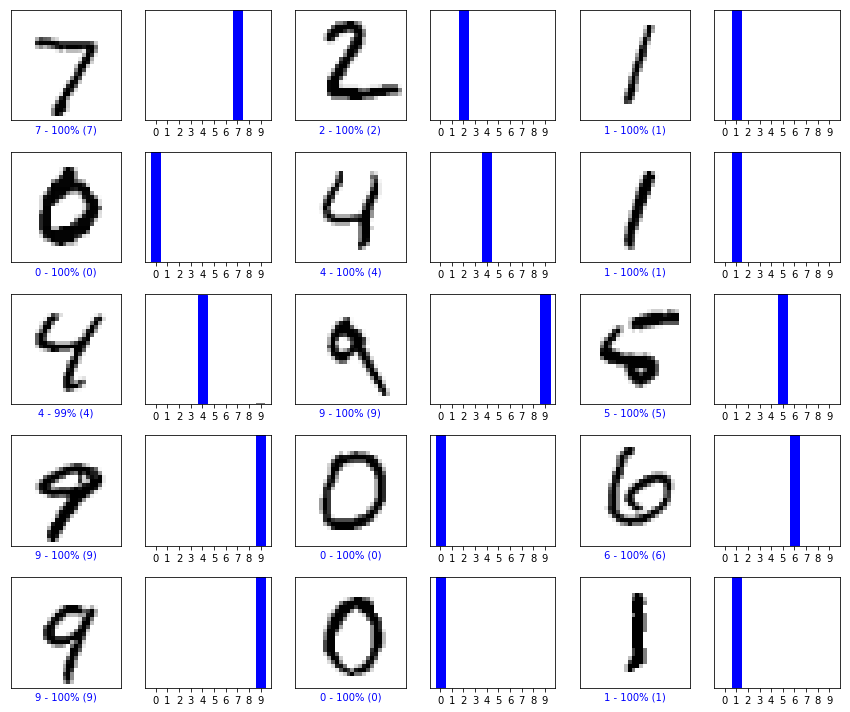

In [50]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, Y_Pred[i], y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, Y_Pred[i],  y_test)
plt.tight_layout()
plt.show()